In [ ]:
#Installing necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# Shup up these stupid warnings
#Suppressing warnings
!pip install shutup
import shutup
shutup.please()

# some stock-specific packages
!pip install yahoo_fin
!pip install requests_html
import yahoo_fin.stock_info as si

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.1/81.1 kB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.4/83.4 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.8/143.8 kB 17.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 12.9 MB/s eta 0:00:00
  Created wheel for bs4: filename=bs4-0.0.1-py3-none-any.whl size=1256 sha256=df5509fde34c67d6f0f387173d5a8f47c9edb19155112f264f625a6a9c28643f
  Stored in directory: /root/.cache/pip/wheels/25/42/45/b773edc52acb16cd2db4cf1a0b47117e2f69bb4eb300ed0e70
  Created wheel for sgmllib3k: filename=sgmllib3k-1.0.0-py3-none-any.whl size=6048 sha256=1c79a0d4b049efe08c3fa8f85893a93404263ce5aa6636010381b25f30b803a7
  Stored in directory: /root/.cache/pip/wheels/f0/69/93/a47e9d621be168e9e33c7ce60524393c0b92ae83cf6c6e89c5
Successfully built bs4 sgmllib3k
  Attempting uninstall: urllib3
    Found exis

In [ ]:
#Installing some necessary packages
%matplotlib inline
from pylab import *

import shutil
import sys
import os.path

if not shutil.which("pyomo"):
    !pip install -q pyomo
    assert(shutil.which("pyomo"))

if not shutil.which("ipopt"):
    # here is the IPOPT zip file
    !gdown 10XRvLZqrpSNiXVAN-pipU52BVRwoGcNQ
    !unzip -o -q ipopt-linux64_dw
    assert(shutil.which("ipopt") or os.path.isfile("ipopt"))

from pyomo.environ import *

SOLVER = 'ipopt'
EXECUTABLE = '/content/ipopt'
ipopt_executable = '/content/ipopt'

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.5/12.5 MB 18.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 3.3 MB/s eta 0:00:00
Downloading...
From: https://drive.google.com/uc?id=10XRvLZqrpSNiXVAN-pipU52BVRwoGcNQ
To: /content/ipopt-linux64_dw.zip
100% 1.82M/1.82M [00:00<00:00, 52.7MB/s]



**Gathering Stock Market Treasure Maps: Let's Fetch Some Data!**

Selected 30 stocks from three sectors: 'Consumer Staples,' 'Healthcare,' and 'Communication Services.'

Created a tickers_list with 30 stock symbols, 10 from each sector.

Using the Yahoo Finance API (si.get_data),  we gathered historical stock data from Jan 1, 2017, to Dec 31, 2021.

Stored it in the dow_prices dictionary, associating ticker symbols with respective data frames.



In [ ]:
#Selecting 30 stocks, 10 from each sector - 'Consumer Staples', 'Healthcare', 'Communication Services'
# Assigning the selcted 30 stocks to the ticker list
tickers_list = ['CHD', 'KHC', 'SJM', 'PM', 'WMT', 'MDLZ', 'MKC', 'TSN', 'HRL', 'EL',
                'ABBV', 'A', 'BIIB', 'COR', 'CNC', 'DVA', 'XRAY', 'EW', 'ELV', 'GILD',
                'NWS','TMUS', 'GOOGL', 'CHTR', 'CMCSA', 'T', 'DIS', 'IPG', 'META', 'VZ']

#To pull the specific years stock data & creating a data frame called dow_prices
dow_prices = {ticker : si.get_data(ticker,start_date = '01/01/2017',end_date='12/31/2021',interval='1d') for ticker in tickers_list}


In [ ]:
#Calling out the data frame created earlier
dow_prices

{'CHD':                   open        high         low       close   adjclose  \
 2017-01-03   44.250000   44.529999   43.849998   44.340000  40.431244   
 2017-01-04   44.520000   44.970001   44.410000   44.700001  40.759514   
 2017-01-05   44.709999   44.910000   44.480000   44.889999  40.932751   
 2017-01-06   44.869999   44.970001   44.450001   44.869999  40.914520   
 2017-01-09   44.650002   44.730000   43.889999   44.299999  40.394772   
 ...                ...         ...         ...         ...        ...   
 2021-12-23   99.610001  100.339996   99.400002   99.529999  97.179291   
 2021-12-27   99.610001  100.360001   99.370003  100.360001  97.989685   
 2021-12-28  100.489998  100.769997   99.949997  100.180000  97.813942   
 2021-12-29  100.430000  101.239998  100.260002  100.980003  98.595039   
 2021-12-30  101.209999  101.599998  100.330002  101.419998  99.024658   
 
              volume ticker  
 2017-01-03  3126600    CHD  
 2017-01-04  1787300    CHD  
 2017-01-05  

**Extracting and Preparing Historical Stock Data**

**EDA - Detective Work on Stock Behaviors 🕵️‍♂️: Unveiling Market Secrets!**

Creating prep_data, initially containing 'adjclose' prices for the 'CHD' stock, renamed as 'CHD' within the data frame.

It Iterates through tickers_list (excluding 'CHD') and appends each stock's 'adjclose' prices to prep_data.

Gathered historical adjusted closing prices of all selected stocks into prep_data for further analysis and modeling

In [ ]:
#Extracting the adjclose column
#get the adjclose price for the CHD (one sample)
#Creating the prep_data dataframe with the extracted adjclose data
prep_data = pd.DataFrame(dow_prices['CHD']['adjclose']).rename(columns = {"adjclose":"CHD"})

# Using the for loop, We are storing all the stocks adjclose values of tickers list into the data frame called prep_data.
for i in tickers_list[1:]:
  prep_data[i] = pd.DataFrame(dow_prices[i]['adjclose'])
prep_data.head(n=10) #Printing out the first five rows of the prep_data

,CHD,KHC,SJM,PM,WMT,MDLZ,MKC,TSN,HRL,EL,...,NWS,TMUS,GOOGL,CHTR,CMCSA,T,DIS,IPG,META,VZ
2017-01-03,40.431244,64.479088,105.112808,63.832016,60.387127,38.699062,41.740150,53.131920,30.319874,71.806648,...,11.020006,58.066521,40.400501,285.769989,29.753433,18.892864,101.584358,17.956348,116.860001,38.593288
2017-01-04,40.759514,64.110779,104.754204,63.265270,60.738907,38.655918,41.619732,53.887562,30.809610,73.078789,...,11.202909,58.564346,40.388500,291.549988,30.106773,18.783072,102.886719,18.048000,118.690002,38.550854
2017-01-05,40.932751,63.742462,105.283951,63.762043,60.870846,38.828480,40.803574,54.167728,31.067362,72.985924,...,11.202909,57.359608,40.651001,296.170013,30.227421,18.730370,102.829254,17.643196,120.669998,38.635704
2017-01-06,40.914520,63.580376,105.169853,64.258812,60.035313,38.880260,40.763435,53.760208,31.221992,73.505928,...,11.202909,56.523258,41.260502,298.160004,30.279123,18.426577,104.361458,18.055637,123.410004,38.062561
2017-01-09,40.394772,63.403599,104.330399,63.887989,60.431103,38.561005,40.201492,53.191360,30.569033,72.651619,...,11.340087,56.423691,41.359001,296.260010,30.520424,18.194683,103.767738,17.956348,124.900002,37.648056
2017-01-10,39.738243,63.285744,104.925362,63.335251,60.008919,38.112316,40.045403,51.968761,30.001970,71.825203,...,11.431542,58.484695,41.300499,298.200012,30.559212,18.199142,103.786880,17.803589,124.349998,37.705231
2017-01-11,39.720013,63.911873,106.482040,63.279263,60.272797,38.888889,40.241646,52.181019,30.130857,72.735199,...,11.477267,57.210258,41.493000,299.540009,30.899622,18.109957,104.801971,18.101467,126.089996,37.490837
2017-01-12,39.637939,64.398087,106.408676,63.328247,59.780251,38.733570,40.451248,52.376289,30.562527,73.487335,...,11.385814,56.901608,41.476501,297.190002,30.774656,18.288328,102.972908,18.093826,126.620003,37.648056
2017-01-13,39.920624,64.110779,106.767311,63.251286,59.041477,38.483334,40.750053,52.631001,30.674768,73.162369,...,11.385814,56.941429,41.547001,298.429993,31.356363,18.266033,103.480438,18.009811,128.339996,37.555153
2017-01-17,40.595379,64.766418,107.794220,64.622650,60.176037,38.742199,41.334305,52.911179,31.382711,74.146652,...,11.614448,56.802040,41.373001,306.140015,31.265879,18.332930,103.394257,17.963982,127.870003,37.690937


In [ ]:
prep_data.shape #To know the number of rows and columns

(1258, 30)

**Generating Return Features**


Creates `return_data` to store computed return features.
  
Calculate the percentage changes ('pct_change') for each stock's adjusted closing prices in `prep_data` using `tickers_list` and, Add these as new columns in `return_data`.
  
Removed rows with 'NA' values from the computed returns, ensuring a clean dataset.

`return_data` stores the computed percentage change values.

In [ ]:
# create return features for each ticker,
# we will just use a pct_change as the return
return_data = pd.DataFrame() #Creating a new data frame called return_data
for i in tickers_list:
  return_data[i] = prep_data[i].pct_change()
# drop the NA records
return_data.dropna(inplace=True)
return_data

,CHD,KHC,SJM,PM,WMT,MDLZ,MKC,TSN,HRL,EL,...,NWS,TMUS,GOOGL,CHTR,CMCSA,T,DIS,IPG,META,VZ
2017-01-04,0.008119,-0.005712,-0.003412,-0.008879,0.005825,-0.001115,-0.002885,0.014222,0.016152,0.017716,...,0.016597,0.008573,-0.000297,0.020226,0.011876,-0.005811,0.012820,0.005104,0.015660,-0.001100
2017-01-05,0.004250,-0.005745,0.005057,0.007852,0.002172,0.004464,-0.019610,0.005199,0.008366,-0.001271,...,0.000000,-0.020571,0.006499,0.015846,0.004007,-0.002806,-0.000559,-0.022429,0.016682,0.002201
2017-01-06,-0.000445,-0.002543,-0.001084,0.007791,-0.013726,0.001334,-0.000984,-0.007523,0.004977,0.007125,...,0.000000,-0.014581,0.014994,0.006719,0.001710,-0.016219,0.014900,0.023377,0.022707,-0.014835
2017-01-09,-0.012703,-0.002780,-0.007982,-0.005771,0.006593,-0.008211,-0.013785,-0.010581,-0.020913,-0.011622,...,0.012245,-0.001762,0.002387,-0.006372,0.007969,-0.012585,-0.005689,-0.005499,0.012074,-0.010890
2017-01-10,-0.016253,-0.001859,0.005703,-0.008652,-0.006986,-0.011636,-0.003883,-0.022985,-0.018550,-0.011375,...,0.008065,0.036527,-0.001414,0.006548,0.001271,0.000245,0.000184,-0.008507,-0.004404,0.001519
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-23,0.001308,0.003987,-0.001126,0.000215,-0.002218,0.001697,-0.003855,0.003414,0.001468,0.011860,...,0.021286,-0.005391,0.003425,0.013301,0.020396,0.003632,0.011522,0.004361,0.014495,-0.001705
2021-12-27,0.008339,0.005107,0.006467,0.006564,0.009105,0.008931,0.011824,0.011030,0.004396,0.008962,...,0.014634,-0.011092,0.006738,0.006247,0.008795,-0.003619,-0.005403,0.028223,0.032633,0.000000
2021-12-28,-0.001793,0.012137,0.010086,0.003421,0.014351,0.007479,0.008818,0.005919,0.009379,-0.003981,...,0.002185,-0.003542,-0.008245,0.005273,0.000792,0.001614,0.015707,-0.001320,0.000116,0.000759
2021-12-29,0.007986,-0.001394,-0.000740,0.004688,-0.000490,0.005454,0.006950,-0.002884,0.002065,0.006199,...,-0.006978,-0.004401,-0.000218,0.000747,0.001584,-0.007252,-0.002126,-0.001586,-0.009474,-0.006829


### Creating Rolling Averages for Momentum Trading

For each stock in tickers_list,  we calculate the rolling averages for the momentum trading strategy by computing the 8-day and 21-day moving averages based on their historical stock prices stored in prep_data

Created new columns '_8-day' and '_21-day' to store the rolling averages.

Any rows containing 'NA' resulting from the moving averages computation are removed from prep_data to maintain data integrity.

Displays the first 10 rows of the updated prep_data data frame to provide a glimpse of the incorporated rolling average columns.


In [ ]:
# Creating new columns for each stock's rolling averages for momentum trading strategy analysis
for ticker in tickers_list:
    prep_data[f'{ticker}_8-day'] = prep_data[ticker].rolling(8).mean().shift() #8 day moving average
    prep_data[f'{ticker}_21-day'] = prep_data[ticker].rolling(21).mean().shift() #21 day moving average
prep_data.dropna(inplace=True) # Dropping NA values
print(prep_data.head(n=10)) # Displaying the first 10 rows of the updated DataFrame


                  CHD        KHC         SJM         PM        WMT       MDLZ  \
2017-02-02  41.516342  65.274689  112.130119  69.156601  58.663273  37.974247   
2017-02-03  41.771660  65.760872  113.108147  70.744865  58.487389  38.276257   
2017-02-06  41.443398  65.340988  112.472420  69.968231  58.399429  37.974247   
2017-02-07  43.102955  65.422020  113.825317  71.108704  58.830383  37.905228   
2017-02-08  43.613594  65.701965  112.415993  71.808395  59.639530  38.371166   
2017-02-09  43.832428  66.136566  112.833870  71.906342  60.756527  38.569630   
2017-02-10  43.987453  66.445953  113.096085  71.808395  59.824223  38.819859   
2017-02-13  44.151585  66.725899  113.727028  71.878372  59.604355  38.854370   
2017-02-14  44.251873  66.895325  113.022331  71.773422  60.387127  38.819859   
2017-02-15  44.488956  67.105286  113.513977  72.018311  60.413494  39.147732   

                  MKC        TSN        HRL         EL  ...    T_8-day  \
2017-02-02  42.404686  55.339378  

# Time series Visualization of Stock Values for Each Sector (2017-2021)

Using the `iloc` function, the code selects specific stocks from `prep_data` for each sector (10 stocks per sector) to create separate plots for each sector's stock values.

Using `plt.plot(figsize=(12,6))`, we generated line plots for each sector, with the x-axis representing the years and the y-axis depicting the stock values.

Sequentially displays each sector's stock value plot using `plt.show()` for better comparison and analysis.


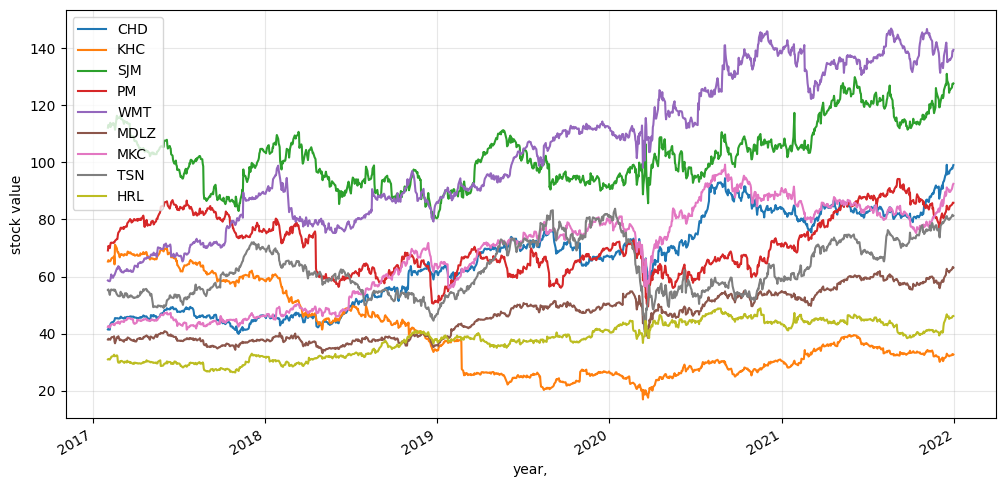

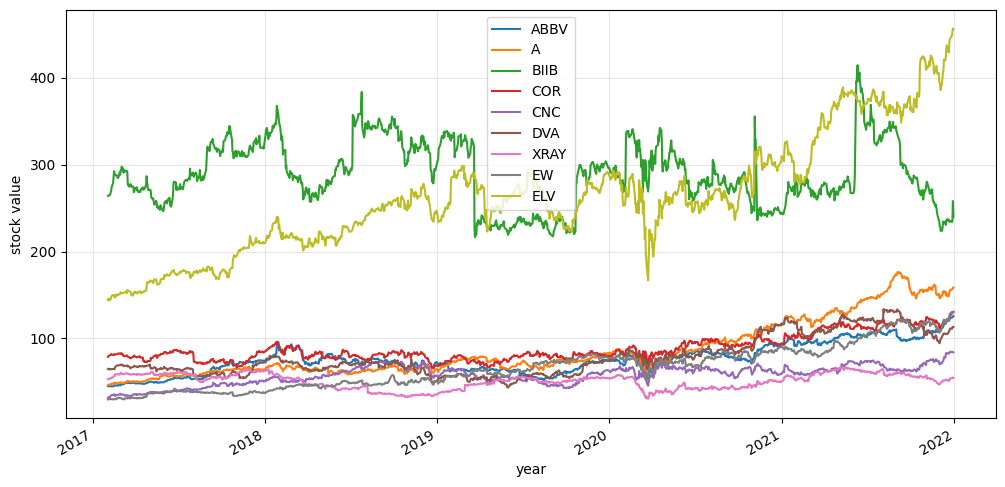

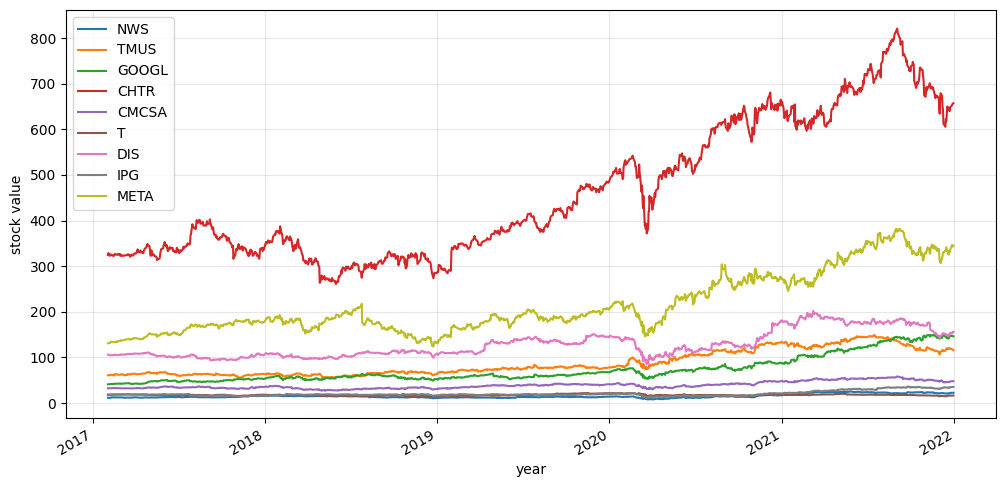

In [ ]:
#Plotting a graph representing stock values for each sector(10stocks) from 2017-2021
#Using iloc to select particular stock from each sector from prep_data
prep_data.iloc[:,0:9].plot(figsize=(12,6)) #Plot size
plt.grid(True, alpha = .3)
xlabel('year,')
ylabel('stock value')
plt.show()

prep_data.iloc[:,10:19].plot(figsize=(12,6))
plt.grid(True, alpha = .3)
xlabel('year')
ylabel('stock value')

plt.show()

prep_data.iloc[:,20:29].plot(figsize=(12,6))
plt.grid(True, alpha = .3)
xlabel('year')
ylabel('stock value')

plt.show()

Within the Consumer Staples sector, SJM initially showed promise but experienced a downturn around 2020-2021. Despite this, it made a notable recovery, securing the second top position post-2021. Meanwhile, WMT exhibited consistent growth and accelerated significantly after 2020, ultimately claiming the leading position within the sector by 2021.

# **BUY AND HOLD STRATEGY**

Generates columns labeled as `'{ticker}_logClose'`, calculating the natural logarithm of the closing prices for each stock.

Computes the `'{ticker}_return'` columns, which represent the difference in logarithmic closing prices (`'{ticker}_logClose'`). This calculation measures the positive or negative change in stock returns over consecutive periods.

Finally, `prep_data.head()` displays the initial rows of the updated data frame, showcasing the newly added log close and return columns.

In [ ]:
#Creating logclose and return columns
for ticker in tickers_list:
  prep_data[f'{ticker}_logClose'] = np.log(prep_data[ticker])
  prep_data[f'{ticker}_return'] = prep_data[f'{ticker}_logClose'].diff() # the difference will be positive or negative
print(prep_data.head())

                  CHD        KHC         SJM         PM        WMT       MDLZ  \
2017-02-02  41.516342  65.274689  112.130119  69.156601  58.663273  37.974247   
2017-02-03  41.771660  65.760872  113.108147  70.744865  58.487389  38.276257   
2017-02-06  41.443398  65.340988  112.472420  69.968231  58.399429  37.974247   
2017-02-07  43.102955  65.422020  113.825317  71.108704  58.830383  37.905228   
2017-02-08  43.613594  65.701965  112.415993  71.808395  59.639530  38.371166   

                  MKC        TSN        HRL         EL  ...  T_logClose  \
2017-02-02  42.404686  55.339378  31.054651  76.143097  ...    2.910400   
2017-02-03  42.752548  55.517677  31.201410  77.090210  ...    2.912098   
2017-02-06  42.150455  53.598885  30.968307  76.904495  ...    2.907482   
2017-02-07  42.618748  54.889397  31.296394  77.443085  ...    2.908942   
2017-02-08  43.037975  55.229019  31.494951  76.598076  ...    2.911128   

            T_return  DIS_logClose  DIS_return  IPG_logClose  

The code resolves missing return values on '2017-02-02' by using `df.loc` to replace these nulls with zeros in the `'{ticker}_return'` columns for all stocks in `prep_data`.

In [ ]:
#As we don't have the return value from the previous record, we get null values for return on 2017-02-02. So we are replacing the null values with 0 using df.loc
for ticker in tickers_list:
  prep_data.loc["2017-02-02",f'{ticker}_return'] = 0.0
prep_data.head()

,CHD,KHC,SJM,PM,WMT,MDLZ,MKC,TSN,HRL,EL,...,T_logClose,T_return,DIS_logClose,DIS_return,IPG_logClose,IPG_return,META_logClose,META_return,VZ_logClose,VZ_return
2017-02-02,41.516342,65.274689,112.130119,69.156601,58.663273,37.974247,42.404686,55.339378,31.054651,76.143097,...,2.910400,0.000000,4.662706,0.000000,2.879400,0.000000,4.873975,0.000000,3.541063,0.000000
2017-02-03,41.771660,65.760872,113.108147,70.744865,58.487389,38.276257,42.752548,55.517677,31.201410,77.090210,...,2.912098,0.001698,4.659900,-0.002807,2.888369,0.008969,4.875045,0.001069,3.547257,0.006194
2017-02-06,41.443398,65.340988,112.472420,69.968231,58.399429,37.974247,42.150455,53.598885,30.968307,76.904495,...,2.907482,-0.004617,4.653260,-0.006640,2.895993,0.007624,4.883256,0.008212,3.535871,-0.011386
2017-02-07,43.102955,65.422020,113.825317,71.108704,58.830383,37.905228,42.618748,54.889397,31.296394,77.443085,...,2.908942,0.001460,4.648044,-0.005216,2.864707,-0.031286,4.881589,-0.001667,3.536079,0.000208
2017-02-08,43.613594,65.701965,112.415993,71.808395,59.639530,38.371166,43.037975,55.229019,31.494951,76.598076,...,2.911128,0.002187,4.648044,0.000000,2.868617,0.003911,4.899331,0.017742,3.542925,0.006846


**Buy and Hold Returns**

We calculate the cumulative return for a specific stock represented by the ticker by summing up all the returns, calculating the exponential of that sum, and finally displaying the result using the print() function.

In [ ]:
#Calculating the buy and hold returns
print("Buy and hold returns")
for ticker in tickers_list:
  print(ticker+ ' : ' + str (np.exp(np.sum( prep_data[f'{ticker}_return'])) -1))

Buy and hold returns
CHD : 1.385197082491826
KHC : -0.4985214507688689
SJM : 0.13797078189269651
PM : 0.24151375686276544
WMT : 1.375460887065965
MDLZ : 0.662676131254708
MKC : 1.18054208414544
TSN : 0.4693189151689754
HRL : 0.48855851283729756
EL : 3.7032119907481045
ABBV : 1.7810530542826104
A : 2.420335370835605
BIIB : -0.09170045028526974
COR : 0.6568206013178028
CNC : 1.624277302319605
DVA : 0.7486878807336461
XRAY : 0.03244448828879021
EW : 3.369107099379944
ELV : 2.155233213747358
GILD : 0.2147896257520654
NWS : 0.9311106301677556
TMUS : 0.9053148495407364
GOOGL : 2.573448706338041
CHTR : 1.0259239020054713
CMCSA : 0.4797225116933699
T : -0.11122411366478191
DIS : 0.47211577058941456
IPG : 0.9740333620163597
META : 1.6319168067099503
VZ : 0.3375053690447829


# **Momentum trading strategy**
# **Momentum Magic: Casting Spells for Winning Stocks!**
Now, we create an 'invested' column within the `prep_data` data frame. This column signifies our investment status for each stock in `tickers_list`.

- If the 9-day moving average (`'{ticker}_8-day'`) surpasses the 21-day moving average (`'{ticker}_21-day'`) for a specific stock, it's denoted as an 'invested' state (assigned a value of 1).
- Otherwise, when the 9-day average is not greater than the 21-day average, it denotes a non-invested or 'out of the market' status (assigned a value of 0).

The resulting data frame (`prep_data.head()`) shows these 'invested' columns, indicating whether to invest in each stock based on comparing between the two moving averages.

In [ ]:
#To show whether we are currently investing money or if we are out of the market we are creating a new column called 'invested'.
#Invested = 1 if the 9-day average is greater than the 21-day average, IF ELSE it is 0
for ticker in tickers_list:
  prep_data[f'{ticker}_invested'] = np.where( prep_data[f'{ticker}_8-day'] > prep_data[f'{ticker}_21-day'], 1, 0)
prep_data.head()

,CHD,KHC,SJM,PM,WMT,MDLZ,MKC,TSN,HRL,EL,...,NWS_invested,TMUS_invested,GOOGL_invested,CHTR_invested,CMCSA_invested,T_invested,DIS_invested,IPG_invested,META_invested,VZ_invested
2017-02-02,41.516342,65.274689,112.130119,69.156601,58.663273,37.974247,42.404686,55.339378,31.054651,76.143097,...,1,1,1,1,1,1,1,1,1,0
2017-02-03,41.771660,65.760872,113.108147,70.744865,58.487389,38.276257,42.752548,55.517677,31.201410,77.090210,...,1,1,1,1,1,1,1,1,1,0
2017-02-06,41.443398,65.340988,112.472420,69.968231,58.399429,37.974247,42.150455,53.598885,30.968307,76.904495,...,1,1,1,1,1,1,1,1,1,0
2017-02-07,43.102955,65.422020,113.825317,71.108704,58.830383,37.905228,42.618748,54.889397,31.296394,77.443085,...,1,1,0,1,1,1,1,1,1,0
2017-02-08,43.613594,65.701965,112.415993,71.808395,59.639530,38.371166,43.037975,55.229019,31.494951,76.598076,...,1,1,0,1,1,1,1,1,1,0


# **Entering and leaving the market using the momentum trading strategy**

This code computes the 'signal' variable for buying and selling stocks within the `tickers_list` based on changes in investment status ('invested').

- Calculates the difference (`diff()`) in consecutive 'invested' states (`'{ticker}_invested'`) for each stock.
- The resulting 'signal' column (`'{ticker}_signal'`) shows the variations in the investment status, providing buy (positive values) or sell (negative values) signals based on changes in the 'invested' state.

In [ ]:
# the variable signal tells you when you buy and sell the stock
for ticker in tickers_list:
  prep_data[f'{ticker}_signal'] = prep_data[f'{ticker}_invested'].diff()


In [ ]:
prep_data.head() #Displaying the first 5 rows of the dataframe

,CHD,KHC,SJM,PM,WMT,MDLZ,MKC,TSN,HRL,EL,...,NWS_signal,TMUS_signal,GOOGL_signal,CHTR_signal,CMCSA_signal,T_signal,DIS_signal,IPG_signal,META_signal,VZ_signal
2017-02-02,41.516342,65.274689,112.130119,69.156601,58.663273,37.974247,42.404686,55.339378,31.054651,76.143097,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-02-03,41.771660,65.760872,113.108147,70.744865,58.487389,38.276257,42.752548,55.517677,31.201410,77.090210,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-02-06,41.443398,65.340988,112.472420,69.968231,58.399429,37.974247,42.150455,53.598885,30.968307,76.904495,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-02-07,43.102955,65.422020,113.825317,71.108704,58.830383,37.905228,42.618748,54.889397,31.296394,77.443085,...,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-02-08,43.613594,65.701965,112.415993,71.808395,59.639530,38.371166,43.037975,55.229019,31.494951,76.598076,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


This code addresses missing values in the 'signal' variable ('{ticker}_signal') on '2017-02-02' within the `prep_data` data frame for each stock in `tickers_list`.

- Now we replace null values in the 'signal' column with a value of 0. This adjustment ensures a uniform representation of signals.

In [ ]:
#As we don't have the invested value from the previous row, we get null values for return on 2017-02-02. So we are replacing the null values with 1 using df.loc
for ticker in tickers_list:
  prep_data.loc["2017-02-02",f'{ticker}_signal'] = 1.0

prep_data.head()

,CHD,KHC,SJM,PM,WMT,MDLZ,MKC,TSN,HRL,EL,...,NWS_signal,TMUS_signal,GOOGL_signal,CHTR_signal,CMCSA_signal,T_signal,DIS_signal,IPG_signal,META_signal,VZ_signal
2017-02-02,41.516342,65.274689,112.130119,69.156601,58.663273,37.974247,42.404686,55.339378,31.054651,76.143097,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2017-02-03,41.771660,65.760872,113.108147,70.744865,58.487389,38.276257,42.752548,55.517677,31.201410,77.090210,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-02-06,41.443398,65.340988,112.472420,69.968231,58.399429,37.974247,42.150455,53.598885,30.968307,76.904495,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-02-07,43.102955,65.422020,113.825317,71.108704,58.830383,37.905228,42.618748,54.889397,31.296394,77.443085,...,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-02-08,43.613594,65.701965,112.415993,71.808395,59.639530,38.371166,43.037975,55.229019,31.494951,76.598076,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Now we calculate the 'system_return' to represent potential gains/losses obtained by applying the momentum trading algorithm to each stock in `tickers_list`.

- Multiplies the 'invested' status (`'{ticker}_invested'`) by the return value (`'{ticker}_return'`) for each stock.
- Generating a new column (`'{ticker}_system_return'`) in `prep_data` that reflects the trading system's returns based on the investment status and actual returns for each stock.

In [ ]:
# The 'system_return' tells you how much money you would have made
# using your momentum trading algorithm!

for ticker in tickers_list:
  prep_data[f'{ticker}_system_return'] = prep_data[f'{ticker}_invested'] * prep_data[f'{ticker}_return']
prep_data.head()


,CHD,KHC,SJM,PM,WMT,MDLZ,MKC,TSN,HRL,EL,...,NWS_system_return,TMUS_system_return,GOOGL_system_return,CHTR_system_return,CMCSA_system_return,T_system_return,DIS_system_return,IPG_system_return,META_system_return,VZ_system_return
2017-02-02,41.516342,65.274689,112.130119,69.156601,58.663273,37.974247,42.404686,55.339378,31.054651,76.143097,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
2017-02-03,41.771660,65.760872,113.108147,70.744865,58.487389,38.276257,42.752548,55.517677,31.201410,77.090210,...,0.000000,0.003428,0.002283,0.013168,0.002261,0.001698,-0.002807,0.008969,0.001069,0.0
2017-02-06,41.443398,65.340988,112.472420,69.968231,58.399429,37.974247,42.150455,53.598885,30.968307,76.904495,...,-0.003976,-0.006540,0.001815,-0.018763,-0.009613,-0.004617,-0.006640,0.007624,0.008212,-0.0
2017-02-07,43.102955,65.422020,113.825317,71.108704,58.830383,37.905228,42.618748,54.889397,31.296394,77.443085,...,0.000000,0.015141,0.000000,0.002384,0.004284,0.001460,-0.005216,-0.031286,-0.001667,0.0
2017-02-08,43.613594,65.701965,112.415993,71.808395,59.639530,38.371166,43.037975,55.229019,31.494951,76.598076,...,-0.008000,0.000000,0.000000,0.007272,-0.002274,0.002187,0.000000,0.003911,0.017742,0.0


Now we compute the momentum trading strategy returns for each stock in `tickers_list`.

- Using a loop over the tickers to compute the momentum trading returns for each stock.
- Calculates and prints the strategy's returns for each stock in `tickers_list`.
- The resulting `MT_returns` list accumulates the computed returns for further analysis.

In [ ]:
#Calculating and Displaying the Momentum Trading returns
print("Momentum Trading Strategy Returns")
MT_returns = []
for ticker in tickers_list:
  MT_returns.append(np.exp(np.sum( prep_data[f'{ticker}_system_return'])) -1)
  print(ticker+ ' : ' + str (np.exp(np.sum( prep_data[f'{ticker}_system_return'])) -1))


Momentum Trading Strategy Returns
CHD : 0.7352995756975402
KHC : 0.03945836752900589
SJM : -0.43497767234132434
PM : 0.285647690539385
WMT : 0.3541231786932335
MDLZ : 0.27002712505733273
MKC : 0.39666467112147763
TSN : 0.4066149128429277
HRL : -0.007169988691519857
EL : 0.8946118767799904
ABBV : 1.205801301225783
A : 0.7842891678385089
BIIB : -0.6989990066137842
COR : -0.25731265826537475
CNC : 0.3204898807619472
DVA : -0.08486825909768181
XRAY : -0.0485775840401913
EW : 1.1580614325792622
ELV : 1.0831547585511854
GILD : -0.06337557945895111
NWS : 0.5482334068198214
TMUS : -0.12817403856158804
GOOGL : 0.8711072847345422
CHTR : 0.8109461586953814
CMCSA : 0.2788511342569875
T : -0.4828821674430853
DIS : 0.1639419815690033
IPG : -0.25195478617845746
META : 0.2073716858896848
VZ : -0.07355717100426573


 Plot the performance of 8-21 momentum trading strategy for each stock returns over year.  

- Using nested loops to plot cumulative returns for each stock in `tickers_list` based on the calculated system returns.
- Displaying three separate graphs (one for each sector) using `plt.figure(i)` and `plt.show()` to visualize cumulative returns over time.
- Each graph shows 10 stocks using their respective cumulative returns, labeled by their ticker symbols.

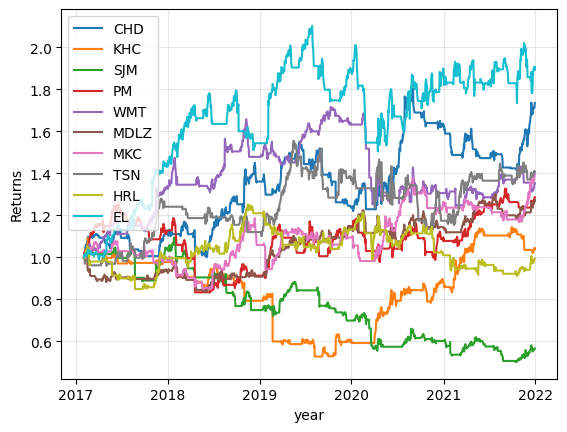

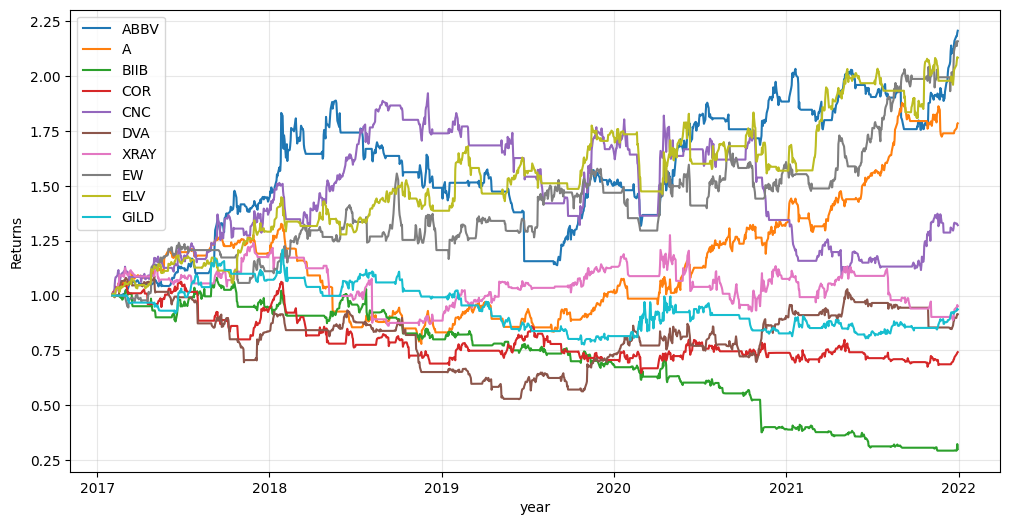

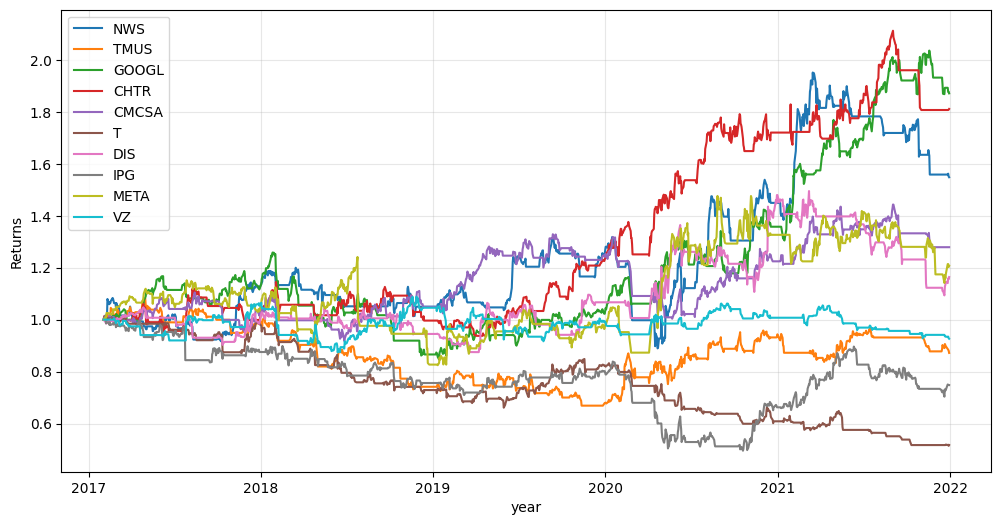

In [ ]:
#To generate multiple line plots to visualize the cumulative returns of 30 stocks over time. Plotting each sector in a seperate graph
for i in range(3):
 plt.figure(i)
 plt.rcParams['figure.figsize'] = 12, 6
 for j in range(10):
  plt.plot(np.exp(prep_data[f'{tickers_list[10*i+j]}_system_return']).cumprod(), label=tickers_list[10*i+j])
  xlabel('year')
  ylabel('Returns')
 plt.legend(loc=2)
 plt.grid(True, alpha=.3)
 plt.show()

Consumer Staples Sector: Initially, EL, CHD, and WMT experienced robust growth in the early years. However, the aftermath of the pandemic had a pronounced impact on WMT, causing a significant decline, and it has since maintained a relatively steady level. Conversely, TSN exhibited resilience, maintaining a stable value throughout the pandemic period. Ultimately, the top three performing stocks are EL, CHD, and TSN.

Healthcare Sector: ABBV, CNC, and ELV initially experienced substantial growth in the early years, with their trajectories disrupted by the onset of the pandemic. While all three faced downturns during this period, ABBV and ELV rebounded swiftly. In contrast, CNC encountered a pronounced decline in its value, and although it did not recover as rapidly, stocks A and EW experienced significant upward momentum. Consequently, the top three performing stocks at the conclusion of this analysis are ABBV, EW, and ELV.

Communication Sector: Following the pandemic, CHTR, NWS, and GOOGL demonstrated noteworthy growth, emerging as the top three performing stocks in the final analysis.

In the below code, we are assigning each sector stocks from tickers_list by creating a seperate list and also creating seperate lists for momentum trading returns for each sector.

Selecting the Top 9 stocks from three sectors.

- Divides the `tickers_list` and `MT_returns` into three sectors: 'Consumer Staples,' 'Healthcare,' and 'Communication Services.'
- Sorts the stocks within each sector based on their returns in descending order, using `zip()` and `sorted()` functions.
- Creates separate lists for the top-performing stocks (top 3 from each sector) and consolidates them into a `top9_stocks_list`.
- Displays the lists containing the top stocks and their corresponding returns for each sector.


In [ ]:
consumerstaples = tickers_list[0:10]
consumerstaple_returns = MT_returns[0:10]
healthcare = tickers_list[10:20]
healthcare_returns = MT_returns[10:20]
communicationservices = tickers_list[20:30]
communicationservices_returns = MT_returns[20:30]
#Sorting out the stocks in each sector
consumerstaple_returns, consumerstaples = zip(*sorted(zip(consumerstaple_returns,
                                                          consumerstaples), reverse = True))

healthcare_returns, healthcare = zip(*sorted(zip(healthcare_returns,
                                                          healthcare), reverse = True))

communicationservices_returns, communicationservices = zip(*sorted(zip(communicationservices_returns,
                                                          communicationservices), reverse = True))


print(consumerstaples)
print(consumerstaple_returns)
print(healthcare)
print(healthcare_returns)
print(communicationservices)
print(communicationservices_returns)
#Creating a seperate list for top 9 stocks taking the top 3 from each sector
top9_stocks_list = list(consumerstaples[0:3] ) + list(healthcare[0:3]) + list(communicationservices[0:3])

print("Top 9 stocks ", ":" , top9_stocks_list)


('EL', 'CHD', 'TSN', 'MKC', 'WMT', 'PM', 'MDLZ', 'KHC', 'HRL', 'SJM')
(0.8946118767799904, 0.7352995756975402, 0.4066149128429277, 0.39666467112147763, 0.3541231786932335, 0.285647690539385, 0.27002712505733273, 0.03945836752900589, -0.007169988691519857, -0.43497767234132434)
('ABBV', 'EW', 'ELV', 'A', 'CNC', 'XRAY', 'GILD', 'DVA', 'COR', 'BIIB')
(1.205801301225783, 1.1580614325792622, 1.0831547585511854, 0.7842891678385089, 0.3204898807619472, -0.0485775840401913, -0.06337557945895111, -0.08486825909768181, -0.25731265826537475, -0.6989990066137842)
('GOOGL', 'CHTR', 'NWS', 'CMCSA', 'META', 'DIS', 'VZ', 'TMUS', 'IPG', 'T')
(0.8711072847345422, 0.8109461586953814, 0.5482334068198214, 0.2788511342569875, 0.2073716858896848, 0.1639419815690033, -0.07355717100426573, -0.12817403856158804, -0.25195478617845746, -0.4828821674430853)
Top 9 stocks  : ['EL', 'CHD', 'TSN', 'ABBV', 'EW', 'ELV', 'GOOGL', 'CHTR', 'NWS']


In [ ]:
#collecting data of top 9 stocks
opt_data = prep_data[top9_stocks_list]
opt_data.head()

,EL,CHD,TSN,ABBV,EW,ELV,GOOGL,CHTR,NWS
2017-02-02,76.143097,41.516342,55.339378,45.217590,29.910000,144.652252,40.912998,324.410004,11.522994
2017-02-03,77.090210,41.771660,55.517677,45.054226,30.156668,145.955109,41.006500,328.709991,11.522994
2017-02-06,76.904495,41.443398,53.598885,45.039379,29.956667,143.872375,41.081001,322.600006,11.477267
2017-02-07,77.443085,43.102955,54.889397,44.972538,30.236668,145.505524,41.461498,323.369995,11.477267
2017-02-08,76.598076,43.613594,55.229019,44.942829,30.276667,145.514694,41.493999,325.730011,11.385814


# **OPTIMIZATION MODEL**

Create a new DataFrame named `opt_return_data` to store calculated return features for the top 9 selected stocks (`top9_stocks_list`).
It computes the percentage change ('pct_change') for each stock's adjusted closing prices from the `opt_data`. Any resulting 'NA' records from the calculations are then removed, ensuring a clean dataset for analysis and modeling.

In [ ]:
# create return features for each ticker,
# we will just use a pct_change as the return
opt_return_data = pd.DataFrame()
for i in top9_stocks_list:
  opt_return_data[i] = opt_data[i].pct_change()
# drop the na records
opt_return_data.dropna(inplace=True)
opt_return_data

,EL,CHD,TSN,ABBV,EW,ELV,GOOGL,CHTR,NWS
2017-02-03,0.012439,0.006150,0.003222,-0.003613,0.008247,0.009007,0.002285,0.013255,0.000000
2017-02-06,-0.002409,-0.007858,-0.034562,-0.000330,-0.006632,-0.014270,0.001817,-0.018588,-0.003968
2017-02-07,0.007003,0.040044,0.024077,-0.001484,0.009347,0.011351,0.009262,0.002387,0.000000
2017-02-08,-0.010911,0.011847,0.006187,-0.000661,0.001323,0.000063,0.000784,0.007298,-0.007968
2017-02-09,0.002061,0.005018,0.005227,0.005288,-0.000110,0.019420,0.000217,-0.002026,0.024097
...,...,...,...,...,...,...,...,...,...
2021-12-23,0.011860,0.001308,0.003414,0.007876,0.005789,0.003966,0.003425,0.013301,0.021286
2021-12-27,0.008962,0.008339,0.011030,0.009918,0.015633,0.008360,0.006738,0.006247,0.014634
2021-12-28,-0.003981,-0.001793,0.005919,-0.000149,-0.009419,0.010206,-0.008245,0.005273,0.002185
2021-12-29,0.006199,0.007986,-0.002884,0.007218,0.009973,0.007454,-0.000218,0.000747,-0.006978


# **TOP 9 STOCK VALUES OVER YEAR**

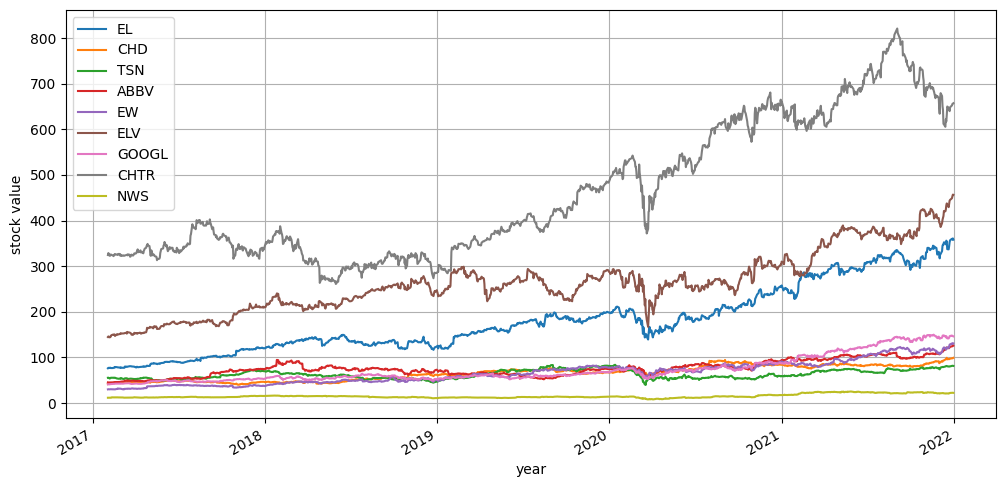

In [ ]:
#Plotting top 9 stocks values over year from 2017-2021
opt_data.plot()
plt.xlabel('year')
plt.ylabel('stock value')
plt.grid(True)
plt.show()

Insights: Here, we took the top 9 stocks from all the three sectors after calculating return features. Among the 9 stocks, three of them show promising growth over the period of time. They are CHTR from Communication sector, ELV from Healthcare sector and EL from Consumer Stapels sector.

**Stock Value High? But What About Variability!?**

Create a covariance table among the returns of the top 9 stocks (`opt_return_data_cov`). This helps to assess how these stocks move together or independently in terms of variability. Additionally, it calculates the average return of each stock (`df_return`) to understand their typical performance.


In [ ]:
# creating covariance table on stock return dataframe
opt_return_data_cov = opt_return_data.cov()
print(opt_return_data_cov)
print('\n') # return/blank line

# create the average of each stock
# these are the objective function COEFFICIENTS!
df_return = opt_return_data.mean()
print(df_return)

             EL       CHD       TSN      ABBV        EW       ELV     GOOGL  \
EL     0.000330  0.000076  0.000111  0.000105  0.000151  0.000143  0.000150   
CHD    0.000076  0.000206  0.000057  0.000062  0.000070  0.000076  0.000057   
TSN    0.000111  0.000057  0.000355  0.000081  0.000098  0.000117  0.000083   
ABBV   0.000105  0.000062  0.000081  0.000313  0.000122  0.000161  0.000139   
EW     0.000151  0.000070  0.000098  0.000122  0.000376  0.000168  0.000163   
ELV    0.000143  0.000076  0.000117  0.000161  0.000168  0.000427  0.000157   
GOOGL  0.000150  0.000057  0.000083  0.000139  0.000163  0.000157  0.000294   
CHTR   0.000104  0.000061  0.000079  0.000097  0.000110  0.000127  0.000121   
NWS    0.000154  0.000044  0.000115  0.000097  0.000131  0.000153  0.000143   

           CHTR       NWS  
EL     0.000104  0.000154  
CHD    0.000061  0.000044  
TSN    0.000079  0.000115  
ABBV   0.000097  0.000097  
EW     0.000110  0.000131  
ELV    0.000127  0.000153  
GOOGL  0.0001

Create a Pyomo ConcreteModel and defines variables representing stock symbols within a range of 0 to 1.

These variables are likely used to set constraints or parameters for an optimization problem in Pyomo.

In [ ]:
from pyomo.environ import *
m = ConcreteModel()

# defining variables
m.EL = Var(within=NonNegativeReals, bounds=(0,1))
m.CHD = Var(within=NonNegativeReals, bounds=(0,1))
m.TSN = Var(within=NonNegativeReals, bounds=(0,1))
m.ABBV = Var(within=NonNegativeReals, bounds=(0,1))
m.EW = Var(within=NonNegativeReals, bounds=(0,1))
m.ELV = Var(within=NonNegativeReals, bounds=(0,1))
m.GOOGL = Var(within=NonNegativeReals, bounds=(0,1))
m.CHTR = Var(within=NonNegativeReals, bounds=(0,1))
m.NWS = Var(within=NonNegativeReals, bounds=(0,1))

In [ ]:
# declare objective
m.objective = Objective(expr =
                        m.EL*df_return[0] +
                        m.CHD*df_return[1] +
                        m.TSN*df_return[2] +
                        m.ABBV*df_return[3] +
                        m.EW*df_return[4]+
                        m.ELV*df_return[5]+
                        m.GOOGL*df_return[6]+
                        m.CHTR*df_return[7]+
                        m.NWS*df_return[8],
                        sense=maximize) # yes, we want to MAX our returns!

# declare constraints
# Sum of all proportions = 1
m.sum_proportions = Constraint(expr = m.EL + m.CHD + m.TSN + m.ABBV + m.EW + m.ELV + m.GOOGL + m.CHTR +m.NWS == 1)

#Set maximum risk: WE ARE INCLUDING THIS CONSTRAINT NOW FOR TECHNICAL REASONS (see below), YOU CAN (and should!) IGNORE IT FOR NOW!
m.total_risk = Constraint(expr = m.EL + m.CHD + m.TSN + m.ABBV + m.EW + m.ELV + m.GOOGL + m.CHTR +m.NWS >= 0.0)

### **Risk: Where Stock Market Gets Its Zing!**
Its time to calculate risk
Create a function `calc_risk` that computes the portfolio risk using the covariance matrix of returns for the selected stocks.

The calculated risk is used to establish a sequence of risk levels within a specified range (from 0.00001 to `max_risk`) with small steps (0.0000005).

In [ ]:
# creating calculations table for calculate the risk
#  Calculate risk
def calc_risk(m):
  variables = [m.EL, m.CHD, m.TSN, m.ABBV, m.EW, m.ELV , m.GOOGL , m.CHTR ,m.NWS]
  tickers = ["EL","CHD","TSN","ABBV","EW","ELV" ,"GOOGL","CHTR","NWS"]
  risk_exp = 0
  for i in range(len(variables)):
    for j in range(len(variables)):
      risk_exp += variables[i]*opt_return_data_cov.at[tickers[i],tickers[j]]*variables[j]
  return risk_exp

# We are going to use this expression to compute the risk
expr_risk = calc_risk(m)


max_risk = 0.0004
# Sequence of risk levels
risk_limits = np.arange(0.00001, max_risk, 0.0000005) # take tiny steps
risk_limits
len(risk_limits) #Displaying the number of risk limits

780

Perform an optimization process by updating the risk constraint for each limit within the `risk_limits` list.

Use loop to modify the risk constraint and solve the problem using the 'ipopt' solver from Pyomo.

The resulting allocations for different stock proportions are stored in `param_analysis` and the respective returns associated with each risk limit are stored in `returns`.

Additionally, it filters out infeasible solutions and captures optimal solutions, considering the termination condition and solver status to ensure the computed allocations are feasible.

In [ ]:
from pyomo.opt import SolverStatus, TerminationCondition

# updating risk contraint for each limit and then solving the problem
param_analysis = {} # key=risk, value =stock allocations
returns = {} # key=risk, value = return
for r in risk_limits:
  # Remove constraint to avoid error messages
  m.del_component(m.total_risk)
  m.total_risk = Constraint(expr = expr_risk <= r)
  # run solver
  result = SolverFactory('ipopt', executable=ipopt_executable).solve(m)


  # Filtering out the infeasible solutions
  if result.solver.termination_condition != TerminationCondition.optimal:
    continue



  result = result.write()

  # store our allocation proportions

  param_analysis[r] = {
    'EL': m.EL(),
    'CHD': m.CHD(),
    'TSN': m.TSN(),
    'ABBV': m.ABBV(),
    'EW': m.EW(),
    'ELV': m.ELV(),
    'GOOGL': m.GOOGL(),
    'CHTR': m.CHTR(),
    'NWS': m.NWS()
}
  # store our returns
  returns[r] =  m.EL()*df_return[0] + m.CHD()*df_return[1] + m.TSN()*df_return[2] + m.ABBV()*df_return[3] +m.EW()*df_return[4]+m.ELV()*df_return[5]+m.GOOGL()*df_return[6]+m.CHTR()*df_return[7]+m.NWS()*df_return[8]


  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally in

Streaming output truncated to the last 5000 lines.
- Status: ok
  Message: Ipopt 3.12.13\x3a Optimal Solution Found
  Termination condition: optimal
  Id: 0
  Error rc: 0
  Time: 0.016990184783935547
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0
# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 2
  Number of variables: 9
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# -----------------------

Use Pandas to transform a dictionary `param_analysis` into a dataframe.

This dataframe presents the proportions of the portfolio corresponding to various risk limits.

In [ ]:
# generating the dataframe for proportions of the portfolio for each risk limit
param_analysis = pd.DataFrame.from_dict(param_analysis, orient='index')
param_analysis

,EL,CHD,TSN,ABBV,EW,ELV,GOOGL,CHTR,NWS
0.000113,0.038811,0.368222,0.132732,0.123590,0.039062,0.000000,0.081605,0.132377,0.083600
0.000113,0.038811,0.368222,0.132732,0.123590,0.039062,0.000000,0.081605,0.132377,0.083600
0.000114,0.056086,0.362570,0.120841,0.123802,0.049722,0.000005,0.086827,0.124787,0.075360
0.000114,0.072536,0.357188,0.109518,0.124004,0.059872,0.000006,0.091801,0.117560,0.067515
0.000115,0.083259,0.353676,0.102134,0.124130,0.066487,0.000031,0.095040,0.112845,0.062397
...,...,...,...,...,...,...,...,...,...
0.000398,0.999838,0.000004,0.000003,0.000006,0.000121,0.000009,0.000011,0.000004,0.000004
0.000398,0.999838,0.000004,0.000003,0.000006,0.000121,0.000009,0.000011,0.000004,0.000004
0.000399,0.999838,0.000004,0.000003,0.000006,0.000121,0.000009,0.000011,0.000004,0.000004
0.000399,0.999838,0.000004,0.000003,0.000006,0.000121,0.000009,0.000011,0.000004,0.000004


In [ ]:
x = param_analysis.index
x[250:300]

Float64Index([0.00023750000000000014, 0.00023800000000000012,
              0.00023850000000000013, 0.00023900000000000014,
              0.00023950000000000013, 0.00024000000000000014,
              0.00024050000000000013, 0.00024100000000000014,
              0.00024150000000000012, 0.00024200000000000014,
              0.00024250000000000015, 0.00024300000000000013,
              0.00024350000000000015, 0.00024400000000000013,
              0.00024450000000000014, 0.00024500000000000015,
              0.00024550000000000017,  0.0002460000000000002,
              0.00024650000000000014, 0.00024700000000000015,
              0.00024750000000000016,  0.0002480000000000002,
              0.00024850000000000013, 0.00024900000000000014,
              0.00024950000000000016, 0.00025000000000000017,
               0.0002505000000000002, 0.00025100000000000014,
              0.00025150000000000015, 0.00025200000000000016,
               0.0002525000000000002, 0.00025300000000000013,
        

Make a line plot representing the optimal stock allocation across various risk levels.

It renames the columns of the `param_analysis` dataframe and plots the stock allocation proportions against the risk levels.

Additionally, a black dotted line is drawn to indicate the optimal solution, emphasizing the allocation for three stocks from the top 9 stocks at a specific risk level.

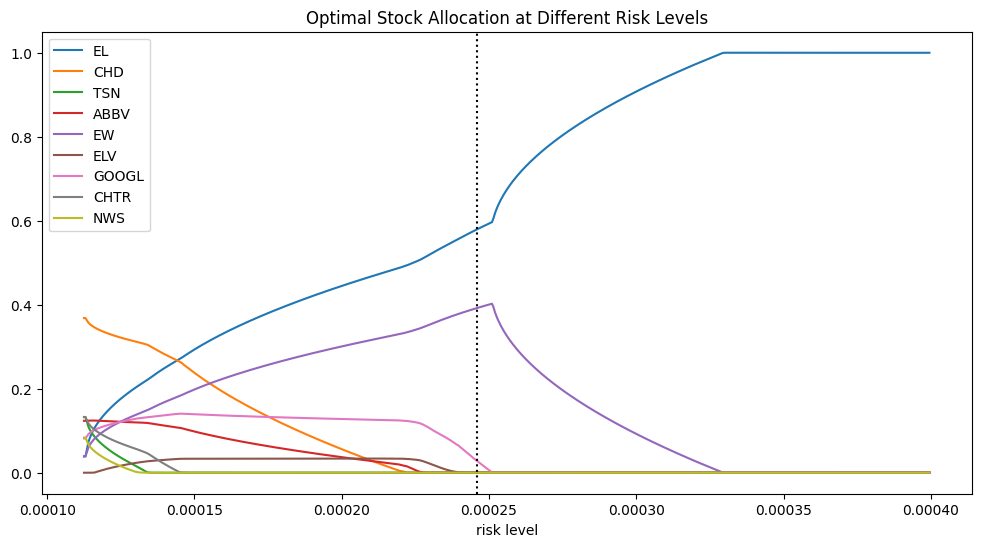

In [ ]:
#Plotting the graph for optimal stock allocation at different risk levels.
#The dotted line represents the optimal solution meeting the three stocks from the top 9 stocks
param_analysis.columns =["EL","CHD","TSN","ABBV","EW","ELV" ,"GOOGL","CHTR","NWS"]
param_analysis.plot()
plt.title('Optimal Stock Allocation at Different Risk Levels')
plt.axvline(x = 0.0002460000000000002, color = 'black', linestyle= 'dotted')
xlabel('risk level')
plt.legend()
plt.show()

Upon selecting a risk level of 0.000246, the associated line delineates a portfolio consisting of three stocks.

Use the `param_analysis` dataframe to retrieve and round off the portfolio allocation proportions at a specific risk level (0.0002460000000000002).

The resulting `portfolio` variable represents the rounded allocation percentages for the selected stocks at that particular risk level.

In [ ]:
#Portfolio Allocation
portfolio= param_analysis.loc[0.0002460000000000002].round(3)
portfolio

EL       0.580
CHD      0.000
TSN      0.000
ABBV     0.000
EW       0.392
ELV      0.000
GOOGL    0.028
CHTR     0.000
NWS      0.000
Name: 0.0002460000000000002, dtype: float64

Now create two lists, `risk` and `reward`, based on the contents of the `returns` dictionary.

The `risk` list contains the keys extracted from the `returns` dictionary, while the `reward` list contains the corresponding values.

This operation aims to extract and display the keys (risk) and values (reward) separately from the dictionary.

In [ ]:
# subset
risk = list(returns.keys()) # coerce dict_keys to a list
print(risk)
reward = list(returns.values()) # coerce dict_values to a list
print(reward)

[0.00011250000000000006, 0.00011300000000000006, 0.00011350000000000006, 0.00011400000000000006, 0.00011450000000000006, 0.00011500000000000006, 0.00011550000000000006, 0.00011600000000000005, 0.00011650000000000007, 0.00011700000000000007, 0.00011750000000000006, 0.00011800000000000006, 0.00011850000000000006, 0.00011900000000000006, 0.00011950000000000006, 0.00012000000000000007, 0.00012050000000000007, 0.00012100000000000007, 0.00012150000000000007, 0.00012200000000000007, 0.00012250000000000008, 0.00012300000000000006, 0.00012350000000000007, 0.00012400000000000006, 0.00012450000000000007, 0.00012500000000000008, 0.00012550000000000007, 0.00012600000000000008, 0.00012650000000000007, 0.00012700000000000008, 0.00012750000000000006, 0.00012800000000000008, 0.0001285000000000001, 0.00012900000000000007, 0.00012950000000000008, 0.00013000000000000007, 0.00013050000000000008, 0.00013100000000000007, 0.00013150000000000008, 0.00013200000000000006, 0.00013250000000000008, 0.00013300000000

Use the `pylab` library to generate a plot showing the relationship between risk and return for various risk levels (from the `risk` and `reward` lists).

It adds a vertical red line to indicate the specific portfolio risk level at 0.0002450000000002, aiding in visualizing where this portfolio aligns within the Efficient Frontier.

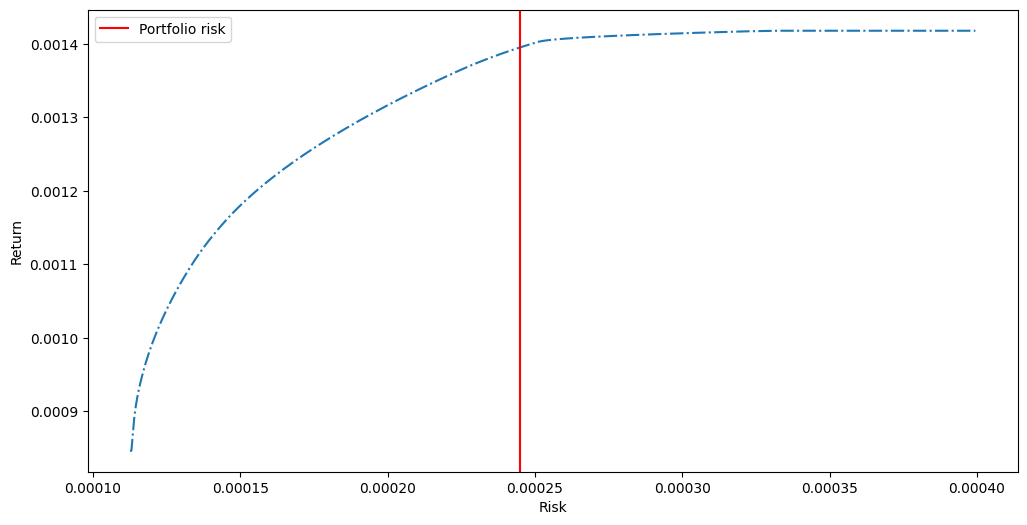

In [ ]:
#Efficient Frontier for different risk levels
# plot! pylab makes it easy
from pylab import *
plot(risk, reward, '-.')
title('')
xlabel('Risk')
ylabel('Return')
plt.axvline(x = 0.0002450000000002, color = 'red' , label = 'Portfolio risk')
plt.legend()
plt.show()


The red line indicates that the selected risk level offers a promising return, closely approaching the maximum achievable return rewards.

Filter the `portfolio` DataFrame to retain only the stocks with a portfolio allocation greater than 0.

It then displays the top 3 stocks based on the portfolio allocation proportions.

In [ ]:
#Filtering out the stocks with portfolio allocation of more than 0
portfolio = portfolio.loc[portfolio > 0]
portfolio #Top 3 stocks

EL       0.580
EW       0.392
GOOGL    0.028
Name: 0.0002460000000000002, dtype: float64

# **ANALYSIS**

Computes the investment amount allocated to the top three stocks based on the portfolio allocation proportions derived earlier.

It multiplies the percentage allocations from the `portfolio` by the total investment amount of $100,000, distributing the investment accordingly among the top stocks.

The resulting `invest_amt` variable stores a list of these investments.

In [ ]:
#The total investment money given is $100,000
invest_amt= list(100000*portfolio) #Dividig the allocated investing money to top 3 stocks depending on the portfolio allocation proportions
invest_amt

[57999.99999999999, 39200.0, 2800.0]

Create a dataframe named `port_prep_data` by utilizing the Yahoo Finance API (`si.get_data`).

It collects stock data for the stocks identified in the `port_stocks` list for the year 2022, retrieving daily stock information within the specified date range.

In [ ]:
port_stocks = portfolio.index #portfolio stocks

top_stocks = [tickers_list.index(i) for i in port_stocks]


#To pull the specific year stock data & creating a data frame called port_prep_data
port_prep_data = {ticker : si.get_data(ticker,start_date = '01/01/2022',end_date='12/31/2022',interval='1d') for ticker in port_stocks }
port_prep_data


{'EL':                   open        high         low       close    adjclose  \
 2022-01-03  368.489990  374.200012  366.910004  370.290009  360.993073   
 2022-01-04  372.109985  373.980011  368.140015  371.859985  362.523621   
 2022-01-05  367.000000  368.660004  356.100006  356.109985  347.169098   
 2022-01-06  357.000000  357.570007  353.000000  355.390015  346.467194   
 2022-01-07  355.000000  357.459991  350.070007  354.929993  346.018707   
 ...                ...         ...         ...         ...         ...   
 2022-12-23  242.100006  242.839996  238.750000  241.020004  237.306793   
 2022-12-27  241.779999  249.820007  241.779999  248.289993  244.464783   
 2022-12-28  247.850006  249.649994  246.110001  246.190002  242.397141   
 2022-12-29  248.789993  251.179993  247.929993  249.929993  246.079514   
 2022-12-30  248.330002  248.839996  245.119995  248.110001  244.287567   
 
              volume ticker  
 2022-01-03  1026700     EL  
 2022-01-04  1012700     EL  
 2

Create a DataFrame named `port_data` to store the 'Adjusted Close' values of the top 3 stocks obtained from the `port_prep_data` DataFrame.

It iterates through each stock in the `port_stocks` list, retrieves the 'Adjusted Close' values from the `port_prep_data` DataFrame for each stock, and assigns these values as columns in the `port_data` DataFrame.

In [ ]:
#Creating a new data frame called port_data to store adjclose values of top 3 stocks
port_data = pd.DataFrame()
for i in port_stocks:
  port_data[i] = pd.DataFrame(port_prep_data[i]['adjclose'])
port_data

,EL,EW,GOOGL
2022-01-03,360.993073,128.339996,144.991501
2022-01-04,362.523621,127.889999,144.399506
2022-01-05,347.169098,123.919998,137.774994
2022-01-06,346.467194,123.230003,137.747498
2022-01-07,346.018707,122.300003,137.016998
...,...,...,...
2022-12-23,237.306793,74.190002,89.230003
2022-12-27,244.464783,73.589996,87.389999
2022-12-28,242.397141,73.110001,86.019997
2022-12-29,246.079514,75.209999,88.449997


# **BUY AND HOLD STRATEGY FOR MPT PORTFOLIO**

Drop missing values from the dataframe `port_data`.

Adds a new column named 'Total_investment' initialized with zeros.

Iterates through each stock in the `port_stocks` list.
   - Calculate the logarithmic change in 'Adjusted Close' values for each stock, assigning the difference to columns suffixed with 'invested_amount'.
   - Replaces the value on the date '2022-01-03' with 0.
   - Compute the cumulative product of the exponential values and multiplies them by the corresponding investment amounts for each stock.
   - Aggregate the cumulative investment for all stocks into the 'Total_investment' column.

In [ ]:
port_data.dropna(inplace=True) #Dropping NA values
port_data['Total_investment'] = 0
for i in port_stocks:
  port_data[i+'invested_amount'] = np.log(port_data[i]).diff() #log close values
  port_data.loc['2022-01-03', i+'invested_amount'] = 0
  port_data[i+'invested_amount'] = np.exp(port_data[i+'invested_amount']).cumprod()
  port_data[i+'invested_amount'] = port_data[i+'invested_amount']*invest_amt[list(port_stocks).index(i)]
  port_data['Total_investment']  +=  port_data[i+'invested_amount']

port_data.head()

,EL,EW,GOOGL,Total_investment,ELinvested_amount,EWinvested_amount,GOOGLinvested_amount
2022-01-03,360.993073,128.339996,144.991501,100000.000000,58000.000000,39200.000000,2800.000000
2022-01-04,362.523621,127.889999,144.399506,100097.031174,58245.909953,39062.553523,2788.567698
2022-01-05,347.169098,123.919998,137.774994,96289.531142,55778.930987,37849.961562,2660.638594
2022-01-06,346.467194,123.230003,137.747498,95965.475546,55666.157495,37639.210452,2660.107599
2022-01-07,346.018707,122.300003,137.016998,95595.253096,55594.100137,37355.152380,2646.000579


# **S&P 500 Stock Analysis**

Retreive the historical stock data for the S&P 500 index from December 2, 2021, to December 31, 2022, with a daily interval.

Create a DataFrame named `sandp500` for the 'Adjusted Close' prices.

In [ ]:
#To pull the specific years stock data & creating a data frame called sandp500
sandp500 = pd.DataFrame(si.get_data('^GSPC',start_date = '12/02/2021',end_date='12/31/2022',interval='1d')['adjclose'])
sandp500.head()

,adjclose
2021-12-02,4577.100098
2021-12-03,4538.430176
2021-12-06,4591.669922
2021-12-07,4686.750000
2021-12-08,4701.209961


# **BUY AND HOLD FOR S and P 500**

Compute the returns for 'Buy and Hold' Strategy on the S&P 500 Index.

All over the process again!
- It calculates the logarithm of the 'Adjusted Close' prices, computes the daily returns, and assigns a value of 0.0 to the initial return value (at index 0).
- Then we  calculate the cumulative returns using the exponential function on the summed returns, storing the result in `sandp500_bh_returns`.

In [ ]:
i = 'adjclose'
sandp500_bh_returns=[]
sandp500.dropna(inplace=True)
sandp500['logClose'] = np.log(sandp500[i])
sandp500['return'] = sandp500['logClose'].diff()
sandp500.iloc[0,2] = 0.0
sandp500_bh_returns.append(np.exp(np.sum(sandp500['return'])) -1)#Buy and hold strategy returns
#print(sandp500_bh_returns)
sandp500.head()

,adjclose,logClose,return
2021-12-02,4577.100098,8.428821,0.000000
2021-12-03,4538.430176,8.420336,-0.008484
2021-12-06,4591.669922,8.431999,0.011663
2021-12-07,4686.750000,8.452495,0.020496
2021-12-08,4701.209961,8.455575,0.003081


# **Momemtum Trading for S and P 500**

Create a dataframe for S&P 500 momentum trading returns and initializes an empty list sandp500_mt_returns to store the computed returns.

- It calculates 8-day and 21-day moving averages for the stock data 'i'.

- Drop NA values.

- Based on the moving average crossover, it determines investment days and generates corresponding signals.

- System returns are calculated by multiplying investment days with overall returns.

- Lastly, we compute cumulative returns for the momentum trading strategy and appends them to the sandp500_mt_returns list


In [ ]:
#Creating a dataframe for the momentum trading returns for S&P 500
sandp500_mt_returns = []
sandp500['8-day'] = sandp500[i].rolling(8).mean().shift() #8 day moving average
sandp500['21-day'] = sandp500[i].rolling(21).mean().shift() #21 day moving average
sandp500.dropna(inplace=True) #dropping na
#if the 8 day moving average is greater than 21day moving average then we are investing on that particular day
sandp500['invested'] = np.where(sandp500['8-day'] > sandp500['21-day'], 1, 0)
sandp500['signal'] = sandp500['invested'].diff()
sandp500.iloc[0,6] = 1.0 #substituting 0 where the first row of signal is null value
sandp500['system_return'] = sandp500['invested'] * sandp500['return']
sandp500_mt_returns.append(np.exp(np.sum(sandp500['system_return'])) -1)
print(sandp500_mt_returns)
sandp500.head()

[-0.0961057426449844]


,adjclose,logClose,return,8-day,21-day,invested,signal,system_return
2022-01-03,4796.560059,8.475654,0.006354,4748.386292,4682.474330,1,1.0,0.006354
2022-01-04,4793.540039,8.475024,-0.000630,4766.802551,4692.924805,1,0.0,-0.000630
2022-01-05,4700.580078,8.455441,-0.019583,4778.925049,4705.072893,1,0.0,-0.019583
2022-01-06,4696.049805,8.454477,-0.000964,4775.773804,4710.259091,1,0.0,-0.000964
2022-01-07,4677.029785,8.450419,-0.004058,4763.881287,4710.701939,1,0.0,-0.004058


In [ ]:
print(sandp500)

               adjclose  logClose    return        8-day       21-day  \
2022-01-03  4796.560059  8.475654  0.006354  4748.386292  4682.474330   
2022-01-04  4793.540039  8.475024 -0.000630  4766.802551  4692.924805   
2022-01-05  4700.580078  8.455441 -0.019583  4778.925049  4705.072893   
2022-01-06  4696.049805  8.454477 -0.000964  4775.773804  4710.259091   
2022-01-07  4677.029785  8.450419 -0.004058  4763.881287  4710.701939   
...                 ...       ...       ...          ...          ...   
2022-12-23  3844.820068  8.254482  0.005851  3887.898743  3955.666190   
2022-12-27  3829.250000  8.250424 -0.004058  3866.045013  3946.978574   
2022-12-28  3783.219971  8.238331 -0.012093  3845.286255  3937.603806   
2022-12-29  3849.280029  8.255641  0.017311  3831.220001  3928.998093   
2022-12-30  3839.500000  8.253097 -0.002544  3830.834991  3923.838577   

            invested  signal  system_return  
2022-01-03         1     1.0       0.006354  
2022-01-04         1     0.0   

# **Investment Amount of S&P 500**

Create an empty dataframe named sandp_invest to store investment amounts.

It calculates and populates the dataframe with investment amounts for two strategies, Buy and Hold (BH), and Momentum Trading (MT) of S&P 500.

The 'return' and 'system_return' columns from the 'sandp500' dataframe are used to compute cumulative investment amounts using the initial investment of $100,000 for both strategies.

The resulting dataframe 'sandp_invest' displays the cumulative investment amounts for the Buy and Hold and Momentum Trading strategies of the S&P 500.






In [ ]:
#Creating a data frame to store the investment amount of both buy and hold and momentum trading strategies of S&P 500
#Here, the initial investment amount is $100000
sandp_invest = pd.DataFrame()
sandp_invest['BH investment'] = 100000 * np.exp(sandp500['return']).cumprod() #Buy and hold investment amount
sandp_invest['MT investment'] = 100000 * np.exp(sandp500['system_return']).cumprod() #Momentum trading investment amount

sandp_invest



,BH investment,MT investment
2022-01-03,100637.405253,100637.405253
2022-01-04,100574.041733,100574.041733
2022-01-05,98623.633702,98623.633702
2022-01-06,98528.583299,98528.583299
2022-01-07,98129.521182,98129.521182
...,...,...
2022-12-23,80668.794014,90389.425736
2022-12-27,80342.115883,90389.425736
2022-12-28,79376.352366,90389.425736
2022-12-29,80762.369179,90389.425736



**Displaying Investment Amounts on First Days of Each Month**

Merge two dataframes, sandp_invest and the 'Total_investment' column from port_data, creating a new dataframe named df.

A 'Date' column is added to df using pd.DatetimeIndex based on the index of the dataframe and group the data by year and month.

Finally,we drop the date column from the resulting dataframe to display the investment amounts on the first day of each month.

In [ ]:
#Using concat() we created a new dataframe to store all columns of sandp_invest and total_investment column of port_data
df = pd.concat([sandp_invest, port_data['Total_investment']],axis=1)
df['Date'] = pd.DatetimeIndex(df.index)

# To display the investment amount on the first day of each month
first_day_of_month_index = df.groupby([df.index.year, df.index.month])['Date'].idxmin()

# Retrieve the corresponding rows
first_day_of_month_rows = df.loc[first_day_of_month_index]

# Drop the 'Date' column
first_day_of_month_rows.drop(columns=['Date'], inplace=True)
print(first_day_of_month_rows)

            BH investment  MT investment  Total_investment
2022-01-03  100637.405253  100637.405253     100000.000000
2022-02-01   95391.694636   97751.860260      85101.335277
2022-03-01   90350.335212   92673.522228      81503.791872
2022-04-01   95377.423757   94432.600452      83366.951088
2022-05-02   87184.699897   92370.432595      75177.773534
2022-06-01   86048.572005   92370.432595      71333.900941
2022-07-01   80259.871365   82610.195380      72209.455434
2022-08-01   86413.642181   87255.109670      75630.235052
2022-09-01   83229.125869   85390.369362      69259.509907
2022-10-03   77177.735545   85390.369362      62560.827033
2022-11-01   80905.462140   86711.699246      56527.460568
2022-12-01   85531.178386   91669.383255      62334.453551


**Investment Strategy Showdown: S&P500, Momentum Trading, and MPT Portfolio!**

Plot a  graph to see the performance of three investment strategies over time.

It includes the S&P500 Buy and Hold strategy, S&P500 Momentum Trading strategy, and the MPT Portfolio Buy and Hold strategy.

Each line on the graph represents the total investment value throughout the specified time period.

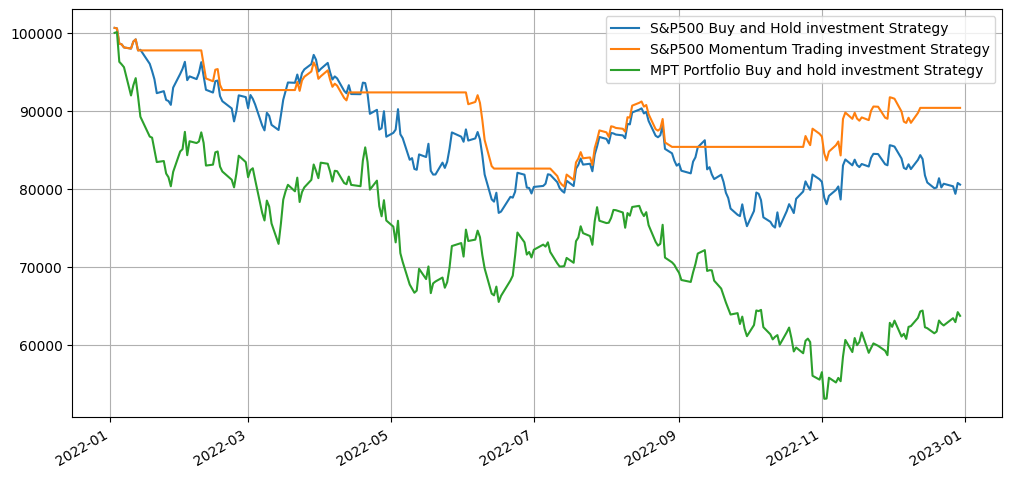

In [ ]:
#Plotting graph with year on x-axis and investment amount on y-axis
#This graph shows the performance of S&P500 Buy and Hold investment strategy, S&P 500 Momentum Trading investment strategy and MPT Portfolio Buy and hold investment strategy
lines = sandp_invest.plot()


port_data['Total_investment'].plot()
plt.legend( ['S&P500 Buy and Hold investment Strategy',
             'S&P500 Momentum Trading investment Strategy',
             'MPT Portfolio Buy and hold investment Strategy'])
plt.grid()
plt.show()

**Conclusion**

-The performance of S&P stocks exceeded our expectations, contrary to our confidence in selecting the best-performing stocks for our portfolio.

-Despite our initial belief in the superior performance of a buy-and-hold strategy for long-term investments, the S&P Momentum trading strategy unexpectedly outperformed our expectations.

-Choosing the right risk levels presents a challenging task, as it requires finding a delicate balance that is neither too high nor too low.

-Despite conducting comprehensive market analysis and research, the performance of our chosen stocks was significantly affected by external factors beyond our control, with the pandemic potentially being one of the contributing reasons, leading to an unforeseen deviation from our initial expectations.

-Ultimately, came to the realization that embracing momentum trading could serve as a viable long-term strategy for our investment approach.



